In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

**Data Cleaning**

In [ ]:
# remove rownumber column
df = df.drop('RowNumber', axis=1)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.set_index('CustomerId', inplace=True)
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


**Exploratory Data Analysis**

In [ ]:
# checking dupclicate and null
print('duplicate value:', df.duplicated().sum())
print('null value:',df.isnull().sum())

duplicate value: 0
null value: Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
print(df.nunique())

Surname            2932
CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


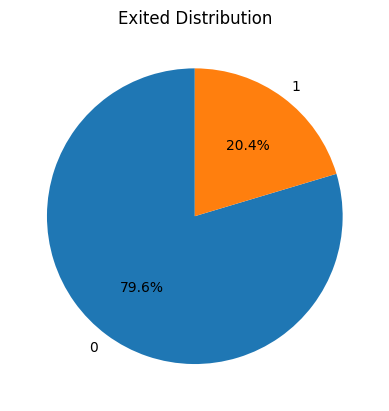

In [ ]:
count = df['Exited'].value_counts()
labels = [0, 1]

plt.pie(count, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Exited Distribution')
plt.show()

<Axes: ylabel='EstimatedSalary'>

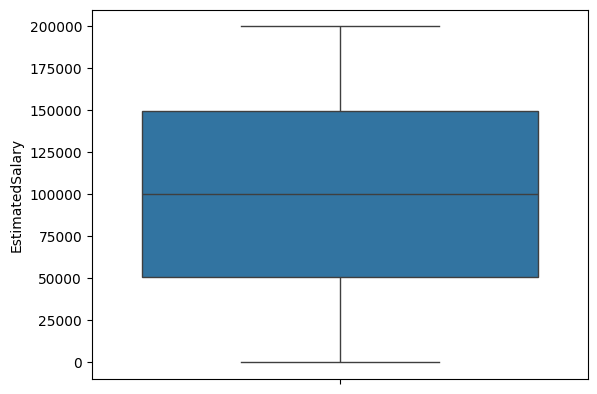

In [ ]:
sns.boxplot(df['EstimatedSalary'])

array([[<Axes: xlabel='CreditScore', ylabel='CreditScore'>,
        <Axes: xlabel='Age', ylabel='CreditScore'>,
        <Axes: xlabel='Tenure', ylabel='CreditScore'>,
        <Axes: xlabel='Balance', ylabel='CreditScore'>,
        <Axes: xlabel='EstimatedSalary', ylabel='CreditScore'>],
       [<Axes: xlabel='CreditScore', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Tenure', ylabel='Age'>,
        <Axes: xlabel='Balance', ylabel='Age'>,
        <Axes: xlabel='EstimatedSalary', ylabel='Age'>],
       [<Axes: xlabel='CreditScore', ylabel='Tenure'>,
        <Axes: xlabel='Age', ylabel='Tenure'>,
        <Axes: xlabel='Tenure', ylabel='Tenure'>,
        <Axes: xlabel='Balance', ylabel='Tenure'>,
        <Axes: xlabel='EstimatedSalary', ylabel='Tenure'>],
       [<Axes: xlabel='CreditScore', ylabel='Balance'>,
        <Axes: xlabel='Age', ylabel='Balance'>,
        <Axes: xlabel='Tenure', ylabel='Balance'>,
        <Axes: xlabel='Balance', ylabel='Balan

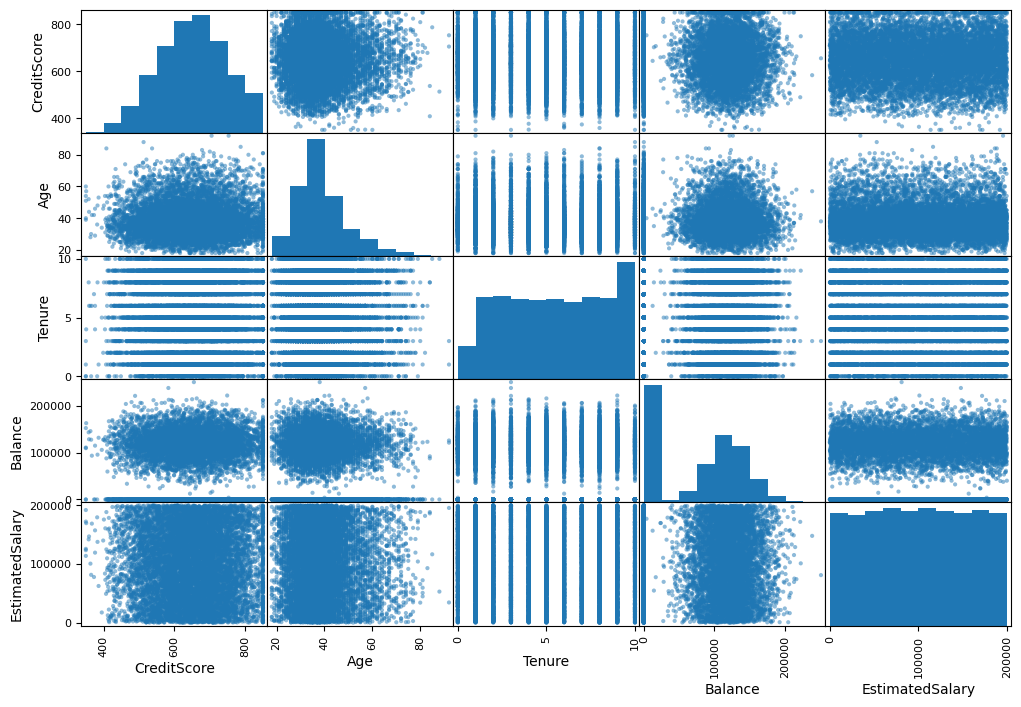

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scatter_matrix(df[attributes], figsize=(12, 8))

In [ ]:
corr_matrix = df[attributes].corr()
corr_matrix['Balance'].sort_values(ascending=False)

,Balance
Balance,1.000000
Age,0.028308
EstimatedSalary,0.012797
CreditScore,0.006268
Tenure,-0.012254


**Data Preprocessing**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# Define the numerical and categorical columns that should be processed as features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

preprocessor = ColumnTransformer(
    transformers=[
        ('num_scaler', MinMaxScaler(), numerical_features),
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

df_prepared = preprocessor.fit_transform(df)

**Logistic Regression & Model Evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

x = df_prepared
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("SMOTE resampling completed successfully.")
print("Shape of original training data (X_train):", x_train.shape)
print("Shape of resampled training data (X_train_resampled):", x_train_resampled.shape)
print("Class distribution before SMOTE (y_train):\n", y_train.value_counts())
print("Class distribution after SMOTE (y_train_resampled):\n", y_train_resampled.value_counts())

SMOTE resampling completed successfully.
Shape of original training data (X_train): (7000, 13)
Shape of resampled training data (X_train_resampled): (11094, 13)
Class distribution before SMOTE (y_train):
 Exited
0    5547
1    1453
Name: count, dtype: int64
Class distribution after SMOTE (y_train_resampled):
 Exited
1    5547
0    5547
Name: count, dtype: int64


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(log_reg, x_train_resampled, y_train_resampled,
                         scoring=['accuracy', 'precision', 'recall', 'f1'],
                         cv=10,
                         return_train_score=False)

In [ ]:
def print_scores(cv_scores_dict):
    print("Accuracy Mean:", cv_scores_dict['test_accuracy'].mean())
    print("Accuracy:", cv_scores_dict['test_accuracy'])
    print("Precision Mean:", cv_scores_dict['test_precision'].mean())
    print("Precision:", cv_scores_dict['test_precision'])
    print("Recall Mean:", cv_scores_dict['test_recall'].mean())
    print("Recall:", cv_scores_dict['test_recall'])
    print("F1 Mean:", cv_scores_dict['test_f1'].mean())
    print("F1:", cv_scores_dict['test_f1'])
print_scores(scores)

Accuracy Mean: 0.7176874710598786
Accuracy: [0.69189189 0.71351351 0.72252252 0.71801802 0.71505861 0.71145176
 0.72948602 0.71505861 0.72317403 0.73669973]
Precision Mean: 0.7193019170864436
Precision: [0.69832402 0.71823204 0.73345936 0.71841155 0.72088725 0.70577933
 0.72566372 0.70804196 0.72252252 0.74169742]
Recall Mean: 0.7142667577324617
Recall: [0.67567568 0.7027027  0.6990991  0.71711712 0.7027027  0.72612613
 0.73873874 0.73104693 0.72382671 0.72563177]
F1 Mean: 0.7166567711425536
F1: [0.68681319 0.71038251 0.71586716 0.71776375 0.71167883 0.71580817
 0.73214286 0.71936057 0.72317403 0.73357664]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

y_pred = log_reg.predict(x_test)
roc_auc_score(y, log_reg.predict_proba(x)[:, 1])

np.float64(0.7700115365425674)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("Model Evaluation on Original Test Set:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test,y_pred))

Model Evaluation on Original Test Set:

Confusion Matrix:
[[1733  683]
 [ 176  408]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      2416
           1       0.37      0.70      0.49       584

    accuracy                           0.71      3000
   macro avg       0.64      0.71      0.64      3000
weighted avg       0.80      0.71      0.74      3000


Accuracy Score:
0.7136666666666667


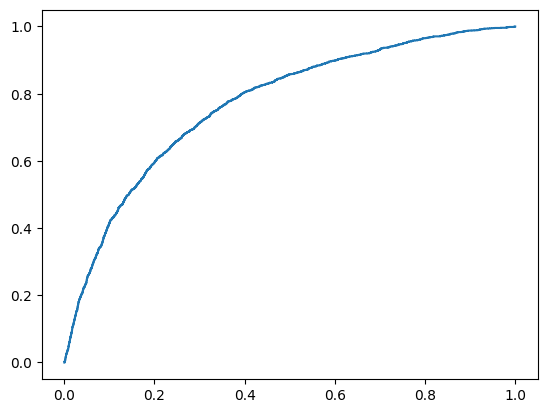

In [ ]:
# display the roc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, log_reg.predict_proba(x)[:, 1])
plt.plot(fpr, tpr)